In [1]:
import cobra
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

In [2]:
# Load the model -- Elad recommends iML1515
coli_model = cobra.io.read_sbml_model("../models/iML1515.xml")

In [3]:
# Set up a medium without C or electron acceptors
my_medium = coli_model.medium.copy()
my_medium['EX_glc__D_e'] = 0 
my_medium['EX_o2_e'] = 0

In [4]:
# List of electron acceptors to test
e_acceptors = {
    'NO3': 'EX_no3_e',
    'O2': 'EX_o2_e',
    #'fumarate': 'EX_fum_e',
    'TMAO': 'EX_tmao_e',
    'DMSO': 'EX_dmso_e',
    'fermentation': None,
}

# Get the C exchanges from the model
c_exchanges = {}
for e in coli_model.exchanges:
    for m in e.metabolites.keys():
        if m.elements.get('C', 0) > 0:
            c_exchanges[e.id] = m.name

# Manual list of C sources to try
c_exchanges2test = [
    dict(name='glucose', type='sugar', ex_id='EX_glc__D_e'),
    dict(name='acetate', type='organic acid', ex_id='EX_ac_e'),
    dict(name='glycerol', type='sugar alcohol', ex_id='EX_glyc_e'),
    dict(name='succinate', type='organic acid', ex_id='EX_succ_e'),
    dict(name='fumarate', type='organic acid', ex_id='EX_fum_e'),
    dict(name='pyruvate', type='organic acid', ex_id='EX_pyr_e'),
    dict(name='lactate', type='organic acid', ex_id='EX_lac__D_e'),
    dict(name='ethanol', type='alcohol', ex_id='EX_etoh_e'),
    dict(name='alanine', type='amino acid', ex_id='EX_ala__L_e'),
    dict(name='glycine', type='amino acid', ex_id='EX_gly_e'),
    dict(name='serine', type='amino acid', ex_id='EX_ser__L_e'),
    dict(name='threonine', type='amino acid', ex_id='EX_thr__L_e'),
    dict(name='valine', type='amino acid', ex_id='EX_val__L_e'),
    dict(name='leucine', type='amino acid', ex_id='EX_leu__L_e'),
    dict(name='isoleucine', type='amino acid', ex_id='EX_ile__L_e'),
    dict(name='cytosine', type='nucleobase', ex_id='EX_cytd_e'),
    dict(name='uracil', type='nucleobase', ex_id='EX_ura_e'),
    dict(name='adenine', type='nucleobase', ex_id='EX_adn_e'),
    dict(name='guanine', type='nucleobase', ex_id='EX_gua_e'),
    dict(name='thymine', type='nucleobase', ex_id='EX_thym_e'),
    dict(name='uridine', type='nucleoside', ex_id='EX_uri_e'),
    dict(name='sucrose', type='sugar', ex_id='EX_sucr_e'),
    dict(name='trehalose', type='sugar', ex_id='EX_tre_e'),
    dict(name='maltose', type='sugar', ex_id='EX_malt_e'),
    dict(name='gluconate', type='sugar acid', ex_id='EX_gal_e'),
    dict(name='glucuronate', type='sugar acid', ex_id='EX_glcur_e'),
    dict(name='galacturonate', type='sugar acid', ex_id='EX_galur_e'),
    dict(name='glucarate', type='sugar acid', ex_id='EX_glcr_e'),
    dict(name='rhamnose', type='sugar', ex_id='EX_rmn_e'),
    dict(name='arabinose', type='sugar', ex_id='EX_arab__L_e'),
    dict(name='xylose', type='sugar', ex_id='EX_xyl__D_e'),
    dict(name='fucose', type='sugar', ex_id='EX_fuc__L_e'),
    dict(name='mannose', type='sugar', ex_id='EX_man_e'),
    dict(name='fructose', type='sugar', ex_id='EX_fru_e'),
    dict(name='sorbitol', type='sugar alcohol', ex_id='EX_sbt__D_e'),
    dict(name='hexadecenoate', type='fatty acid', ex_id='EX_hdcea_e'),
    dict(name='tetradecenoate', type='fatty acid', ex_id='EX_ttdcea_e'),
    dict(name='tetradecanoate', type='fatty acid', ex_id='EX_ttdca_e'),
    dict(name='octadecanoate', type='fatty acid', ex_id='EX_ocdca_e'),
    dict(name='octadecenoate', type='fatty acid', ex_id='EX_ocdcea_e'),
    dict(name='hexanoate', type='fatty acid', ex_id='EX_hxa_e'),
    dict(name='decanoate', type='fatty acid', ex_id='EX_dca_e'),
    dict(name='octanoate', type='fatty acid', ex_id='EX_octa_e'),
    dict(name='hexadecanoate', type='fatty acid', ex_id='EX_hdca_e'),
    dict(name='dodecanoate', type='fatty acid', ex_id='EX_ddca_e'),
    dict(name='3-hydroxypropanoate', type='organic acid', ex_id='EX_3hpp_e'),
    dict(name='phenylacealdehyde', type='aromatic', ex_id='EX_pacald_e'),
    dict(name='phenylpropanoate', type='aromatic', ex_id='EX_pppn_e'),
    dict(name='dopamine', type='aromatic', ex_id='EX_dopa_e'),
    dict(name='tyramine', type='aromatic', ex_id='EX_tym_e'),
]


# Check that all C sources are in the model
for c in c_exchanges2test:
    if c['ex_id'] not in c_exchanges:
        print(c['name'], 'not found')

In [5]:
for ex_id, ex_name in c_exchanges.items():
    print(ex_id, ex_name)


EX_co2_e CO2 CO2
EX_met__L_e L-Methionine
EX_metsox_S__L_e L-Methionine Sulfoxide
EX_acgam_e N-Acetyl-D-glucosamine
EX_cellb_e Cellobiose
EX_crn_e L-Carnitine
EX_hxan_e Hypoxanthine
EX_ile__L_e L-Isoleucine
EX_chol_e Choline C5H14NO
EX_lac__L_e L-Lactate
EX_leu__L_e L-Leucine
EX_glcn_e D-Gluconate
EX_orn_e Ornithine
EX_gln__L_e L-Glutamine
EX_pro__L_e L-Proline
EX_glyc_e Glycerol
EX_man_e D-Mannose
EX_ade_e Adenine
EX_4abut_e 4-Aminobutanoate
EX_ac_e Acetate
EX_akg_e 2-Oxoglutarate
EX_ala__L_e L-Alanine
EX_arg__L_e L-Arginine
EX_asp__L_e L-Aspartate
EX_pyr_e Pyruvate
EX_succ_e Succinate
EX_thymd_e Thymidine C10H14N2O5
EX_rib__D_e D-Ribose
EX_tyr__L_e L-Tyrosine
EX_cytd_e Cytidine
EX_dcyt_e Deoxycytidine
EX_fum_e Fumarate
EX_sbt__D_e D-Sorbitol
EX_glu__L_e L-Glutamate
EX_gua_e Guanine
EX_btn_e Biotin
EX_ptrc_e Putrescine
EX_spmd_e Spermidine
EX_thym_e Thymine C5H6N2O2
EX_xtsn_e Xanthosine
EX_glc__D_e D-Glucose
EX_alltn_e Allantoin
EX_ura_e Uracil
EX_val__L_e L-Valine
EX_xan_e Xanthine
E

In [6]:
# Run FBA for all combinations of C and e- acceptors
growth_data = []
for i, (e, e_ex) in enumerate(e_acceptors.items()):
    for j, c_ex in enumerate(c_exchanges2test):
        tmp_medium = my_medium.copy()
        tmp_medium[c_ex['ex_id']] = 10

        # None signals fermentation (no e- acceptor)
        if e_ex is not None:
            tmp_medium[e_ex] = 1000

        tmp_model = coli_model.copy()
        tmp_model.medium = tmp_medium

        # Calculate the model's growth rate and save
        mu = tmp_model.slim_optimize()
        growth_data.append(dict(
            e_acceptor=e,
            c_source=c_ex['name'],
            c_source_type=c_ex['type'],
            growth_rate_hr=mu,
        ))

In [11]:
# Convert to a dataframe
long_growth_df = pd.DataFrame(growth_data)

# Binarize growth 
long_growth_df['grows'] = long_growth_df.growth_rate_hr > 0.01
growth_mat_df = long_growth_df.pivot_table(
    index='c_source_type,c_source'.split(','), 
    columns='e_acceptor', values='growth_rate_hr').reset_index()
#growth_mat_df = growth_mat_df.fillna(0)

# Drop C sources with no growth at all
no_grow = (growth_mat_df == 0).all(axis=1)
growth_mat_df = growth_mat_df.drop(no_grow.index[no_grow]).sort_values('c_source_type').set_index(
    'c_source_type,c_source'.split(','))

binary_growth_mat_df = growth_mat_df.fillna(0) > 0.001



In [12]:
binary_growth_mat_df

e_acceptor                        DMSO    NO3    O2   TMAO  fermentation
c_source_type c_source                                                  
alcohol       ethanol             True   True  True   True         False
amino acid    alanine             True   True  True   True         False
              glycine             True   True  True   True         False
              serine              True   True  True   True          True
              threonine           True   True  True   True         False
aromatic      phenylacealdehyde  False  False  True  False         False
              phenylpropanoate   False  False  True  False         False
fatty acid    tetradecenoate     False   True  True  False         False
              tetradecanoate     False   True  True  False         False
              octanoate          False   True  True  False         False
              octadecenoate      False   True  True  False         False
              octadecanoate      False   True  True  False         False
              hexadecanoate      False   True  True  False         False
              hexadecenoate      False   True  True  False         False
              dodecanoate        False   True  True  False         False
              decanoate          False   True  True  False         False
              hexanoate          False   True  True  False         False
nucleobase    cytosine            True   True  True   True          True
              adenine             True   True  True   True          True
              guanine            False  False  True  False         False
nucleoside    uridine             True   True  True   True          True
organic acid  acetate            False   True  True  False         False
              fumarate            True   True  True   True          True
              lactate             True   True  True   True         False
              pyruvate            True   True  True   True          True
              succinate          False   True  True  False         False
sugar         xylose              True   True  True   True          True
              trehalose           True   True  True   True          True
              rhamnose            True   True  True   True          True
              mannose             True   True  True   True          True
              maltose             True   True  True   True          True
              glucose             True   True  True   True          True
              fucose              True   True  True   True          True
              fructose            True   True  True   True          True
              arabinose           True   True  True   True          True
sugar acid    galacturonate       True   True  True   True          True
              glucarate           True   True  True   True          True
              gluconate           True   True  True   True          True
              glucuronate         True   True  True   True          True
sugar alcohol glycerol            True   True  True   True          True
              sorbitol            True   True  True   True          True

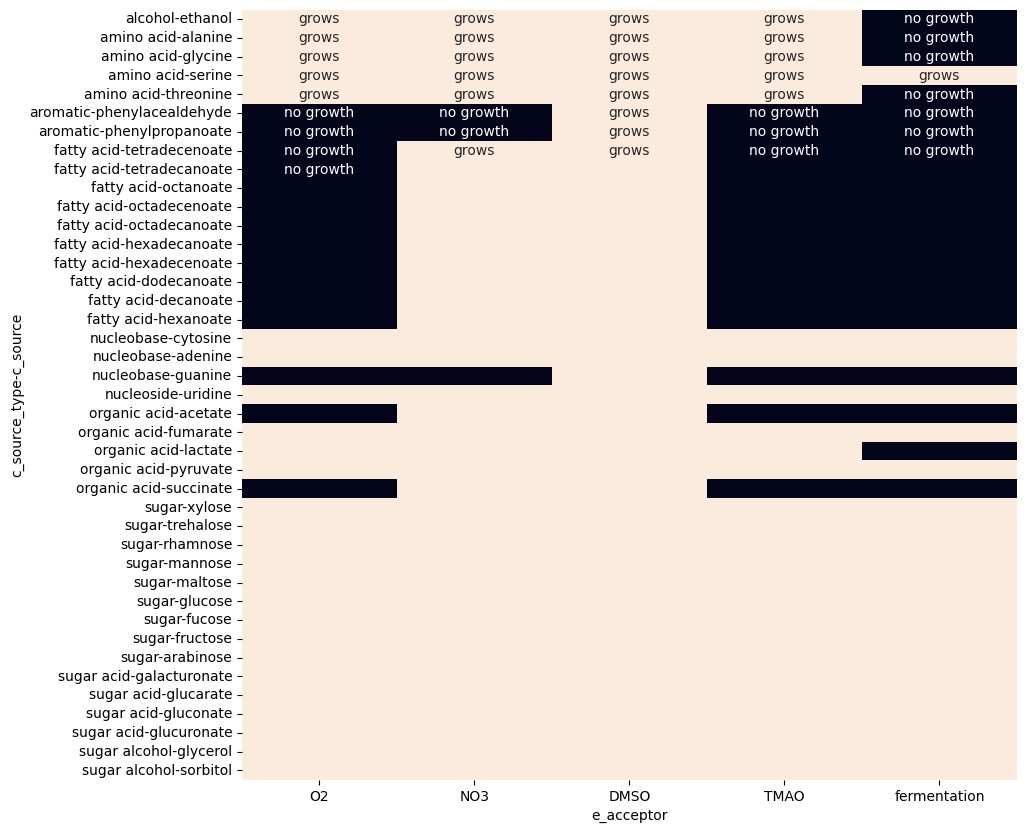

In [13]:
cols = 'O2,NO3,DMSO,TMAO,fermentation'.split(',')
cmap = sns.color_palette('cividis', as_cmap=True)
cmap.set_bad('white')

plt.figure(figsize=(10, 10))
annot = binary_growth_mat_df.replace({True: 'grows', False: 'no growth'})
sns.heatmap(binary_growth_mat_df, annot=annot, cbar=False, fmt='',
            xticklabels=cols)
plt.savefig('../output/iML1515_growth_mat.png', dpi=300, bbox_inches='tight', facecolor='white')

In [9]:
annot

e_acceptor                            DMSO        NO3     O2       TMAO  \
c_source_type c_source                                                    
alcohol       ethanol                grows      grows  grows      grows   
amino acid    alanine                grows      grows  grows      grows   
              glycine                grows      grows  grows      grows   
              serine                 grows      grows  grows      grows   
              threonine              grows      grows  grows      grows   
aromatic      phenylacealdehyde  no growth  no growth  grows  no growth   
              phenylpropanoate   no growth  no growth  grows  no growth   
fatty acid    tetradecenoate     no growth      grows  grows  no growth   
              tetradecanoate     no growth      grows  grows  no growth   
              octanoate          no growth      grows  grows  no growth   
              octadecenoate      no growth      grows  grows  no growth   
              octadecanoate      no growth      grows  grows  no growth   
              hexadecanoate      no growth      grows  grows  no growth   
              hexadecenoate      no growth      grows  grows  no growth   
              dodecanoate        no growth      grows  grows  no growth   
              decanoate          no growth      grows  grows  no growth   
              hexanoate          no growth      grows  grows  no growth   
nucleobase    cytosine               grows      grows  grows      grows   
              adenine                grows      grows  grows      grows   
              guanine            no growth  no growth  grows  no growth   
nucleoside    uridine                grows      grows  grows      grows   
organic acid  acetate            no growth      grows  grows  no growth   
              fumarate               grows      grows  grows      grows   
              lactate                grows      grows  grows      grows   
              pyruvate               grows      grows  grows      grows   
              succinate          no growth      grows  grows  no growth   
sugar         xylose                 grows      grows  grows      grows   
              trehalose              grows      grows  grows      grows   
              rhamnose               grows      grows  grows      grows   
              mannose                grows      grows  grows      grows   
              maltose                grows      grows  grows      grows   
              glucose                grows      grows  grows      grows   
              fucose                 grows      grows  grows      grows   
              fructose               grows      grows  grows      grows   
              arabinose              grows      grows  grows      grows   
sugar acid    galacturonate          grows      grows  grows      grows   
              glucarate              grows      grows  grows      grows   
              gluconate              grows      grows  grows      grows   
              glucuronate            grows      grows  grows      grows   
sugar alcohol glycerol               grows      grows  grows      grows   
              sorbitol               grows      grows  grows      grows   

e_acceptor                      fermentation  
c_source_type c_source                        
alcohol       ethanol              no growth  
amino acid    alanine              no growth  
              glycine              no growth  
              serine               no growth  
              threonine            no growth  
aromatic      phenylacealdehyde    no growth  
              phenylpropanoate     no growth  
fatty acid    tetradecenoate       no growth  
              tetradecanoate       no growth  
              octanoate            no growth  
              octadecenoate        no growth  
              octadecanoate        no growth  
              hexadecanoate        no growth  
              hexadecenoate        no growth  
              dodecano